In [1]:
from typing import Tuple, List
from enum import Enum
import numpy as np
import torch

import matplotlib.pyplot as plt
%matplotlib inline

import purplerl
from purplerl.environments import UnityEnvManager
from purplerl.config import gpu

env = None

In [2]:
if env:
    env.close()
    env = None

import importlib
importlib.reload(purplerl.environments)

file_name = "/home/cthoens/code/UnityRL/ml-agents-robots/Builds/RobotArm.x86_64"
env = UnityEnvManager(file_name, headless=False)

[UnityMemory] Configuration Parameters - Can be set up in boot.config
    "memorysetup-bucket-allocator-granularity=16"
    "memorysetup-bucket-allocator-bucket-count=8"
    "memorysetup-bucket-allocator-block-size=4194304"
    "memorysetup-bucket-allocator-block-count=1"
    "memorysetup-main-allocator-block-size=16777216"
    "memorysetup-thread-allocator-block-size=16777216"
    "memorysetup-gfx-main-allocator-block-size=16777216"
    "memorysetup-gfx-thread-allocator-block-size=16777216"
    "memorysetup-cache-allocator-block-size=4194304"
    "memorysetup-typetree-allocator-block-size=2097152"
    "memorysetup-profiler-bucket-allocator-granularity=16"
    "memorysetup-profiler-bucket-allocator-bucket-count=8"
    "memorysetup-profiler-bucket-allocator-block-size=4194304"
    "memorysetup-profiler-bucket-allocator-block-count=1"
    "memorysetup-profiler-allocator-block-size=16777216"
    "memorysetup-profiler-editor-allocator-block-size=1048576"
    "memorysetup-temp-allocator-siz

/home/cthoens/anaconda3/envs/purplerl/lib/python3.10/site-packages/gym/logger.py:30: UserWarning: WARN: Box bound precision lowered by casting to float32
  warnings.warn(colorize('%s: %s'%('WARN', msg % args), 'yellow'))


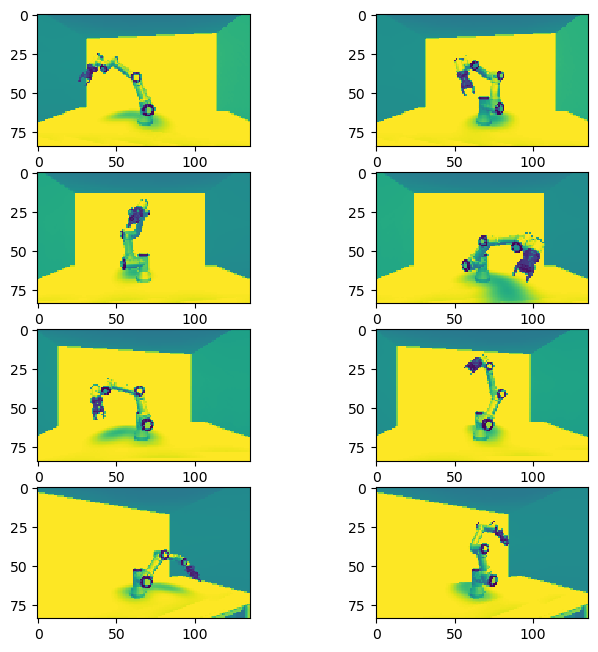

In [3]:
last_obs = env.reset()

fig, axs = plt.subplots(env.env_count, 2, figsize=(8,8), dpi= 100)
for envIdx in range(env.env_count):
    axs[envIdx,0].imshow(last_obs.training[envIdx].cpu().squeeze())
    axs[envIdx,1].imshow(last_obs.goal[envIdx].cpu().squeeze())
plt.show()

In [33]:
class RotationDirection(Enum):
    Negative = 0
    Still = 1
    Positive = 2

def heuristic(obs: purplerl.environments.ObsType, env_index) -> list[int]:
    act = []
    
    for trainingAngle, goalAngle in zip(obs.jointPos[env_index], obs.goalPos[env_index]):
        trainingAngle *= 360
        goalAngle *= 360
        result = None
        if (trainingAngle < goalAngle - 3):
            act.append(RotationDirection.Positive.value)
        elif (trainingAngle > goalAngle + 3):
            act.append(RotationDirection.Negative.value)
        else:
            act.append(RotationDirection.Still.value)
        
    return act

act = torch.tensor([heuristic(last_obs, env_index) for env_index in range(env.env_count)], dtype=torch.int32, device=gpu)

obs, rew, done = env.step(act)

def plot():
    fig, axs = plt.subplots(env.env_count, 3, figsize=(8,8), dpi= 100)
    for envIdx in range(env.env_count):
        if not obs[envIdx]: continue
        axs[envIdx,0].imshow(last_obs.training[envIdx].squeeze())
        axs[envIdx,1].imshow(obs.training[envIdx].squeeze())
        axs[envIdx,2].imshow(obs.goal[envIdx].squeeze())
    plt.show()

print(done)
print(obs.jointPos[0])
print(obs.goalPos[0])
print(obs.jointPos[0]-obs.goalPos[0])
print(obs.remaining[0])
print(env.stats_channel.stats)
print(rew)

last_obs = obs

tensor([0., 0., 1., 0.], device='cuda:0')
tensor([0.0736, 0.1102, 0.1220, 0.0941, 0.1410, 0.1527], device='cuda:0')
tensor([0.0755, 0.1054, 0.1169, 0.0965, 0.1360, 0.1526], device='cuda:0')
tensor([-1.8178e-03,  4.8863e-03,  5.0637e-03, -2.4721e-03,  4.9536e-03,
         8.2821e-05], device='cuda:0')
tensor([15.], device='cuda:0')
defaultdict(<class 'list'>, {'Environment/Success': [(1.0, <StatsAggregationMethod.AVERAGE: 0>), (1.0, <StatsAggregationMethod.AVERAGE: 0>), (1.0, <StatsAggregationMethod.AVERAGE: 0>), (1.0, <StatsAggregationMethod.AVERAGE: 0>), (1.0, <StatsAggregationMethod.AVERAGE: 0>)]})
tensor([ 0.0000, -0.0015,  0.7000, -0.0033], device='cuda:0')


## 

In [34]:
env.close()
env=None

IndexError: tuple index out of range